## **2.1 Images**

In [27]:
import torchvision.datasets as datasets
import matplotlib.pyplot as plt 
import torch

##### Download the MNIST dataset using the torchvision library and create a subset of the dataset containing 1,000 samples. Each sample will include a 28 × 28 pixel image, along with a single integer value denoting the sample’s respective class (number).

In [28]:
mnist_dataset = datasets.MNIST(root='./data', download=True, transform=None)
mnist_subset = torch.utils.data.Subset(mnist_dataset,range(1000))
mnist_dataset = mnist_dataset._load_data()
#print(type(mnist_subset))

##### Plot a histogram of classes in your subset of MNIST.

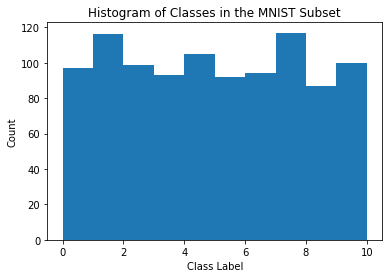

In [29]:
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]
plt.hist(labels, bins=range(11))
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Histogram of Classes in the MNIST Subset')
plt.show()

##### Use the einops python package to ’batch’ the subset of MNIST images. Each batch should contain 25 different samples. Hint: The subset of MNIST image data should change dimensions from [1000, 28, 28] → [Number of Batches, Batch Size, 1, 28, 28] 
##### Context: Deep learning models operate over batches of samples. This rapidly speeds up computation as the forward pass runs parallel across the batch dimension.Batching also can improve optimization and provides the S in SGD (Stochastic Gradient Descent). Additionally, neural networks expect a channel dimension for image data. MNIST is grayscale so it only contains one channel, but other images can contain color, in which case they will have three channels, RGB.

##### Randomly select an MNIST image sample and, using matplotlib, plot it in three dimensions. The x and y-axis’ should be the respective pixel locations, and the z-axis should be the pixel intensity.

## 2.2 Time Series

##### Task: Load the data (energydata complete.csv) and perform the following analysis.

In [30]:
import pandas as pd 
data = pd.read_csv('energydata_complete.csv')
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


##### Plot the appliances energy consumption for whole period and a closer look at anyone week of consumption.

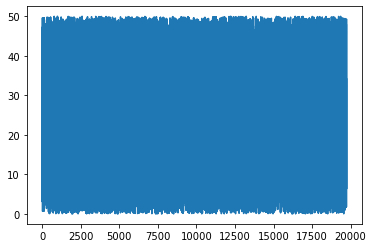

In [31]:
timedata_np = data.to_numpy()
plt.plot( timedata_np[:,28])

In [32]:
print(timedata_np[42,0])
print(timedata_np[7*24*6+42,0])

2016-01-12 00:00:00
2016-01-19 00:00:00


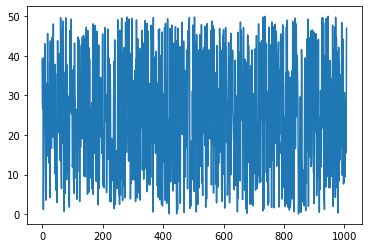

In [33]:
begin = 42
end = 7*24*6 + begin
sub = timedata_np[begin:end, 28]
plt.plot(sub)

##### Plot heatmap of hourly consumption of appliances for a week. An example heatmap looks like Figure 1.

In [36]:
date = data["date"]
to = 